<a href="https://colab.research.google.com/github/xxcramseyxx/SOM-Fraud-Detector/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detector



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
df = pd.read_csv('/content/Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)
print(X)


[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


# Training the SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5) #input_len=# of features sigma=radius learning_rate=how fast the weights are updated
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

# Result Visualization

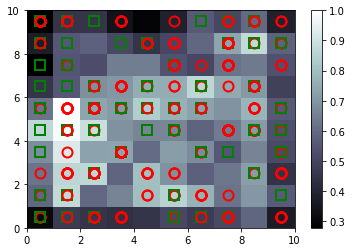

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) #som.distance_map = MID .T=transpose
colorbar()
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X): #i=indexes of customers x=vectors of customers
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor=('None'),
       markersize=(10),
       markeredgewidth=(2))
show()



# Finding the Frauds

In [ ]:
mappings = som.win_map(X)
frauds =np.concatenate((mappings[(1,4)], mappings[(1,5)]), axis=0)
frauds = sc.inverse_transform(frauds)


In [ ]:
print('Customer Fraud IDs')
for i in frauds[:, 0]:
  print(int(i))


Customer Fraud IDs
15734578
15802869
15645820
15800554
15651868
15716082
15593959
15592999
15752344
15611409
15792107
15636454
15608916
15615296
